# Using the Relaxation Method to Solve Laplace’s Equation

Numerical solutions to many physical problems can be found using finite difference methods. In this approach, a regular grid is imposed on a region. At each point on the grid, the differential equation governing the system is approximated. The resulting equations are then solved iteratively. The relaxation method is a relatively simple example. The problem is to find the potential <i>V</i> in empty regions (<i>ρ</i> = 0) when <i>V</i> is known on the boundaries. In other words, we want to find solutions to Laplace’s equation (we’ll concentrate on two-dimensional problems),
$$\frac{\partial^2 V}{\partial x^2}+\frac{\partial^2 V}{\partial y^2}=0.$$
The value of <i>V</i> at a point (<i>x</i>,<i>y</i>) is the average of the values of <i>V</i> on a circle centered around that point,
$$ V(x,y) = \frac{1}{2\pi R}\oint_{\rm{circle}}V d\ell.$$
This suggests that if <i>V</i> is known for points on a grid, the value of <i>V</i> at each point should be the average of <i>V</i> for its nearest neighbors. A solution can be found by cycling through the points on the grid and assigning to each one the average of it neighbors. On each subsequent pass, the updated values are used. After a few iterations, the values change less on each subsequent pass. Eventually, the changes are negligible and a numerical solution has been reached.  
  
First, we need to be able to keep track of the potential at points on a grid. In Python, **`V[3,2]`** refers to an element in a matrix. The first index is for the row, which we’ll associate with the <i>y</i> direction, and the second index is for the column, which we’ll associate with the <i>x</i> direction. The example below shows the elements of a 5x6 matrix. Notice that the lowest value of each index is zero, not one. Each cell in the matrix **`V`** will represent the value of the potential a point in space. We will divide up the region so that the distance <i>d</i> between the points is the same in both directions. The shading in the diagram will be explained later.

In [1]:
#from IPython.display import Image
#Image(filename="relaxation.jpg")

In [2]:
%matplotlib inline

We will use the variables **`NX`** and **`NY`** to for the numbers of cells in the <i>x</i> and <i>y</i> directions. If the distance between the first cell and the last cell in the <i>x</i> direction is **`Nd`**, the matrix must have (<i>N</i> + 1) columns. In the figure above, the distance from the first column to the last column is 5<i>d</i>, so there must be **`NX`**=6 columns.  
  
Second, we need to be able to calculate (approximate) second derivatives with respect to <i>x</i> and <i>y</i>. The first derivative with respect to <i>x</i> halfway between the locations of **`V[i,j]`** and **`V[i,j+1]`** can be approximated as
$$\frac{\partial V}{\partial x}\approx\frac{\Delta V}{\Delta x}=\frac{V[i,j+1]-V[i,j]}{d}.$$
The second derivative with respect to x at the location of V[i,j] can be approximated as
$$\frac{\partial^2 V}{\partial x^2}\approx
\frac{1}{d}\left[\frac{V[i,j+1]-V[i,j]}{d}-\frac{V[i,j]-V[i,j-1]}{d}\right]
=\frac{V[i,j+1]-2V[i,j]+V[i,j-1]}{d^2} $$
Similarly, the second derivative with respect to <i>y</i> at the location of **`V[i,j]`** is approximately
$$\frac{\partial^2 V}{\partial x^2}\approx
\frac{V[i+1,j]-2V[i,j]+V[i-1,j]}{d^2} $$
The two-dimensional version of Laplace’s equation will be approximately satisfied if
$$\frac{V[i,j+1]-2V[i,j]+V[i,j-1]}{d^2} + \frac{V[i+1,j]-2V[i,j]+V[i-1,j]}{d^2} \approx 0$$
so
$$ V[i,j]\approx \frac{V[i,j+1]+V[i,j-1]+V[i+1,j]+V[i-1,j]}{4}$$

In other words, the value of the potential should be approximately equal to the average of the values in the four closest positions.  
  
Finally, we need to know how to apply the condition above iteratively to find a solution. The potential is set for the boundary cells (the ones shaded gray in the figure above) and all of the other cells are initially set to zero. The values are updated iteratively to reach a solution. One iteration consists of updating the values of each of the non-boundary cells using the condition above. The latest available value of each <i>V</i> on the right-hand side of the equation is used. The “difference” between two iterations (**`diff`**) is defined as the maximum of the absolute value of the difference between values of potential for all cells. More iterations are performed until the difference between the last two iterations reaches a specified value (**`maxdiff`**).  
  
Note that the darker gray cells in the corners of the figure are not used in the calculation. However, the value entered in those cells may change the appearance of a contour plot of the results.  
  
The example program shown below uses the relaxation method to solve Laplace’s
equation with the following boundary conditions:
$$ 
V=0 \rm{\ at\ }y=0\rm{\ cm}\\
V=0 \rm{\ at\ }y=5\rm{\ cm}\\
V=0 \rm{\ at\ }x=0\rm{\ cm}\\
V=1\rm{\ V} \rm{\ at\ }x=5\rm{\ cm}
$$
A spacing of <i>d</i> = 1 cm is used, so the matrix is a square $6\times6$ grid.

In [3]:
import numpy as np #includes the zeros function

NX = 6
NY = 6
maxdiff = 1e-6
diff = 1.0 # must start bigger than 'maxdiff'
Vold = np.zeros((NY,NX),float) # fill 'V' with zeros
Vnew = np.zeros((NY,NX),float) 

# Enter the boundary conditions for 'V' other than 0
for i in np.arange(0,NY,1): # j from 0 to NY-1
    Vold[i,NX-1] = 1.0
    Vnew[i,NX-1] = 1.0
print(Vnew) # print the starting values

while diff > maxdiff: # repeat until 'diff' is small
    diff = 0.0 # reset for each iteration
    # Loop over all of the interior points
    for i in np.arange(1,NY-1,1): # i from 1 to NY-2
        for j in np.arange(1,NX-1,1): # j from 1 to NX-2
            Vnew[i,j] = (Vold[i-1,j]+Vold[i+1,j]
                      +Vold[i,j-1]+Vold[i,j+1])/4.0
            lastdiff = abs(Vnew[i,j]-Vold[i,j])
            if lastdiff > diff:
                diff = lastdiff
    np.copyto(Vold,Vnew) # Update: old is now new.
print(Vnew)

[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]
[[0.         0.         0.         0.         0.         1.        ]
 [0.         0.04545314 0.10984622 0.22348258 0.45454405 1.        ]
 [0.         0.07196743 0.17045088 0.32954178 0.5946947  1.        ]
 [0.         0.07196743 0.17045088 0.32954178 0.5946947  1.        ]
 [0.         0.04545314 0.10984622 0.22348258 0.45454405 1.        ]
 [0.         0.         0.         0.         0.         1.        ]]


For each iteration, only the interior (non-boundary) cells are updated. The new value of **`V[i,j]`** is compared with the old value. If the difference between them (**`lastdiff`**) is bigger than any previous differences for the current iteration, it becomes the new value of the difference (**`diff`**). 

Finally, the new updated array is copied onto the old array and the process is iterated. Note that we use the numpy function **np.copyto(destination,source)** to copy the arrays. If would be incorrect to use **Vold=Vnew** since this simply creates a view: from then onwards the two names would refer to the same array, **Vnew**, and the iteration would stop (**lastdiff** would be zero). You can find a more detailed explanation of this subtle point in the <a href=http://www.scipy-lectures.org/intro/numpy/array_object.html#copies-and-viewshttp://www.scipy-lectures.org/intro/numpy/array_object.html#copies-and-views> Scipy Lecture Notes</a>.
  
You can use the **`contour`** function (or **`contourf`**) from the pylab library to display the results of the calculations.

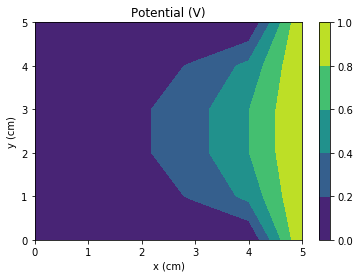

In [4]:
import matplotlib.pyplot as plt
import numpy as np

xlist = np.linspace(0.0,5.0,NX)
ylist = np.linspace(0.0,5.0,NY)
X,Y = np.meshgrid(xlist,ylist)
levels = np.linspace(0.0, 1.0, 6)

fig=plt.figure()
ax = fig.add_subplot(1,1,1)
CP = ax.contourf(X,Y,Vnew,levels)
fig.colorbar(CP)
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_title('Potential (V)')
plt.show()

## Convergence

The algorithm sketched above is a century old method known as Jacobi's method. Although it is a good benchmark method, it coverges too slowly for practical applications: the number
of iterations required to attain a target precission increases with the size of the grid.

<strong>Exercise: </strong> Adapt the algorithm above to keep track of the number of iterations required to reach a target precision. Show that the number of iterations $r$ required to reduce the error by a factor of $10^{-p}$ is 
$$
r \approx \frac{1}{2} p N^2,
$$
for a square lattice with $N^2$ sites.

In [5]:
import numpy as np #includes the zeros function

def get_r(p,N):
    N = N+2
    r = 0
    maxdiff = 10**(-p)
    diff = 1.0 # must start bigger than 'maxdiff'
    Vold = np.zeros((N,N),float) # fill 'V' with zeros
    Vnew = np.zeros((N,N),float) 

    # Enter the boundary conditions for 'V' other than 0
    for i in np.arange(0,N,1): # j from 0 to NY-1
        Vold[i,N-1] = 1.0
        Vnew[i,N-1] = 1.0

    while diff > maxdiff: # repeat until 'diff' is small
        diff = 0.0 # reset for each iteration
        # Loop over all of the interior points
        for i in np.arange(1,N-1,1): # i from 1 to N-2
            for j in np.arange(1,N-1,1): # j from 1 to N-2
                Vnew[i,j] = (Vold[i-1,j]+Vold[i+1,j]
                          +Vold[i,j-1]+Vold[i,j+1])/4.0
                lastdiff = abs(Vnew[i,j]-Vold[i,j])
                if lastdiff > diff:
                    diff = lastdiff
        np.copyto(Vold,Vnew) # Update: old is now new.
        r += 1
    return r


list_p = np.arange(5,10,1.0)
list_N = np.arange(10,30,5)
r = np.zeros((len(list_p),len(list_N)))
theortical = np.zeros((len(list_p),len(list_N)))
baseline = get_r(4,5)

for i in range(len(list_p)) :
    for j in range(len(list_N)) :
        r[i,j] = get_r(list_p[i],list_N[j])- baseline
        theortical[i,j] =  1/2 * (list_p[i]-4) * (list_N[j]-5)**2


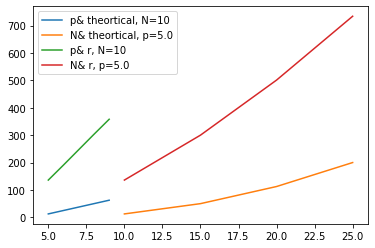

In [6]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(list_p, theortical[:,0], label='p& theortical, N='+str(list_N[0]))
ax.plot(list_N, theortical[0,:], label='N& theortical, p='+str(list_p[0]))
ax.plot(list_p, r[:,0], label='p& r, N='+ str(list_N[0]))
ax.plot(list_N, r[0,:], label='N& r, p='+ str(list_p[0]))
ax.legend()
plt.show()


## Gauss-Seidel method

Another classical method is the Gauss-Seidel method, which uses updated values of V as soon as they become available. For our particular problem, when updating $V[i,j]$ we use the new values of $V[i,j-1]$ and $V[i-1,j]$ instead of copying them from a previous iteration as above.

<strong>Exercise: </strong> Implement the Gauss-Seidel method and show that it converges twice as fast as Jacobi's: 
$$
r \approx \frac{1}{4} p N^2.
$$

Although this is a modest improvement which still renders the Gauss-Seidel impractical, this method is the basis of more powerful multigrid methods that converge in $O(N)$ iterations.

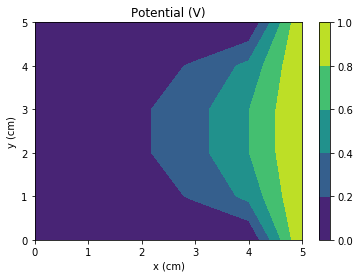

In [7]:
import numpy as np #includes the zeros function
import matplotlib.pyplot as plt

NX = 6
NY = 6
maxdiff = 1e-6
diff = 1.0 # must start bigger than 'maxdiff'
Vold = np.zeros((NY,NX),float) # fill 'V' with zeros
Vnew = np.zeros((NY,NX),float) 

# Enter the boundary conditions for 'V' other than 0
for i in np.arange(0,NY,1): # j from 0 to NY-1
    Vold[i,NX-1] = 1.0
    Vnew[i,NX-1] = 1.0


while diff > maxdiff: # repeat until 'diff' is small
    diff = 0.0 # reset for each iteration
    # Loop over all of the interior points
    for i in np.arange(1,NY-1,1): # i from 1 to NY-2
        for j in np.arange(1,NX-1,1): # j from 1 to NX-2
            Vnew[i,j] = (Vnew[i-1,j]+Vold[i+1,j]
                          +Vnew[i,j-1]+Vold[i,j+1])/4.0
            lastdiff = abs(Vnew[i,j]-Vold[i,j])
            if lastdiff > diff:
                diff = lastdiff
    np.copyto(Vold,Vnew) # Update: old is now new.



xlist = np.linspace(0.0,5.0,NX)
ylist = np.linspace(0.0,5.0,NY)
X,Y = np.meshgrid(xlist,ylist)
levels = np.linspace(0.0, 1.0, 6)

fig=plt.figure()
ax = fig.add_subplot(1,1,1)
CP = ax.contourf(X,Y,Vnew,levels)
fig.colorbar(CP)
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_title('Potential (V)')
plt.show()

In [8]:
import numpy as np #includes the zeros function

def get_r(p,N):
    N = N+2
    r = 0
    maxdiff = 10**(-p)
    diff = 1.0 # must start bigger than 'maxdiff'
    Vold = np.zeros((N,N),float) # fill 'V' with zeros
    Vnew = np.zeros((N,N),float) 

    # Enter the boundary conditions for 'V' other than 0
    for i in np.arange(0,N,1): # j from 0 to NY-1
        Vold[i,N-1] = 1.0
        Vnew[i,N-1] = 1.0

    while diff > maxdiff: # repeat until 'diff' is small
        diff = 0.0 # reset for each iteration
        # Loop over all of the interior points
        for i in np.arange(1,N-1,1): # i from 1 to N-2
            for j in np.arange(1,N-1,1): # j from 1 to N-2
                Vnew[i,j] = (Vnew[i-1,j]+Vold[i+1,j]
                          +Vnew[i,j-1]+Vold[i,j+1])/4.0
                lastdiff = abs(Vnew[i,j]-Vold[i,j])
                if lastdiff > diff:
                    diff = lastdiff
        np.copyto(Vold,Vnew) # Update: old is now new.
        r += 1
    return r


list_p = np.arange(5,10,1.0)
list_N = np.arange(10,30,5)
r = np.zeros((len(list_p),len(list_N)))
theortical = np.zeros((len(list_p),len(list_N)))
baseline = get_r(4,5)

for i in range(len(list_p)) :
    for j in range(len(list_N)) :
        r[i,j] = get_r(list_p[i],list_N[j])- baseline
        theortical[i,j] =  1/4 * (list_p[i]-4) * (list_N[j]-5)**2
#plt.imshow(np.abs(r-theortical))
#print(np.max(np.abs(r-theortical)))

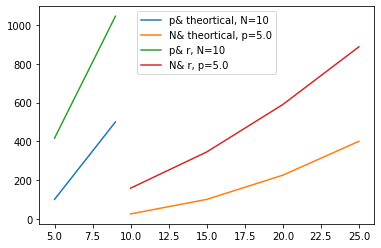

In [9]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(list_p, theortical[:,3], label='p& theortical, N='+str(list_N[0]))
ax.plot(list_N, theortical[3,:], label='N& theortical, p='+str(list_p[0]))
ax.plot(list_p, r[:,3], label='p& r, N='+ str(list_N[0]))
ax.plot(list_N, r[3,:], label='N& r, p='+ str(list_p[0]))
ax.legend()
plt.show()


## Successive Overrelaxation (SOR)

The rate of convergence to a solution can often be improved by “overrelaxation.” The condition above can be rewritten as
$$V[i,j]\approx \omega \frac{V[i,j+1]+V[i,j-1]+V[i+1,j]+V[i-1,j]}{4} +(1-\omega)V[i,j],$$
where $\omega$ is a nonzero constant. Since the two conditions are equivalent, the solutions reached using them are the same. When this condition is used, the current value (on the right-hand side) of the potential for a cell is used in the calculation of the new value (on
the left-hand side). A good choice of $\omega$ can produce much quicker convergence (less iterations are required). For most problems, the optimum value of $\omega$ cannot be known in advance, but $\omega=1.5$ works well in many cases. 

More generally, one can prove that the method is only convergent for $0 < \omega <2$, but only $1<\omega<2$ can typically give faster convergence than Gauss-Seidel. The optimal value of $\omega$ can be found from the largest eigenvalue of the Jacobi iteration matrix. In our particular problem it turns out to be
$$
\omega \approx \frac{2}{1+\pi/N},
$$
and the number of iterations required to achieve convergence is
$$
r \approx \frac{1}{3} p N.
$$
Hence, to get a 3-figure accuracy requires a number of iterations equal to the mesh points along a side of the grid and about twice as much for a six-figure accuracy. For a typical lattice size of $100 \times 100$ this is a huge improvement!

<strong> Exercise: </strong> Implement the SOR method and test its convergence rate for different values of $\omega$. Check the relations above for the optimal values.

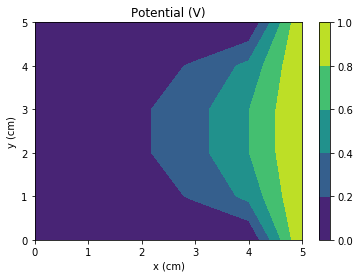

In [10]:
import numpy as np #includes the zeros function
import matplotlib.pyplot as plt

NX = 6
NY = 6
w = 2/(1+ 3.14/float(NX))
maxdiff = 1e-6
diff = 1.0 # must start bigger than 'maxdiff'
Vold = np.zeros((NY,NX),float) # fill 'V' with zeros
Vnew = np.zeros((NY,NX),float) 

# Enter the boundary conditions for 'V' other than 0
for i in np.arange(0,NY,1): # j from 0 to NY-1
    Vold[i,NX-1] = 1.0
    Vnew[i,NX-1] = 1.0

while diff > maxdiff: # repeat until 'diff' is small
    diff = 0.0 # reset for each iteration
    # Loop over all of the interior points
    for i in np.arange(1,NY-1,1): # i from 1 to NY-2
        for j in np.arange(1,NX-1,1): # j from 1 to NX-2
            Vnew[i,j] = w*((Vnew[i-1,j]+Vnew[i+1,j]
                      +Vnew[i,j-1]+Vnew[i,j+1])/4.0)+(1-w)*Vnew[i,j]
            lastdiff = abs(Vnew[i,j]-Vold[i,j])
            if lastdiff > diff:
                diff = lastdiff
    np.copyto(Vold,Vnew) # Update: old is now new.



xlist = np.linspace(0.0,5.0,NX)
ylist = np.linspace(0.0,5.0,NY)
X,Y = np.meshgrid(xlist,ylist)
levels = np.linspace(0.0, 1.0, 6)

fig=plt.figure()
ax = fig.add_subplot(1,1,1)
CP = ax.contourf(X,Y,Vnew,levels)
fig.colorbar(CP)
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_title('Potential (V)')
plt.show()

17


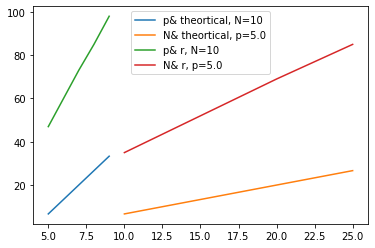

In [11]:
import numpy as np #includes the zeros function

def get_r(p,N):
    w = 2/(1+ 3.14/float(N))
    N = N+2
    r = 0
    maxdiff = 10**(-p)
    diff = 1.0 # must start bigger than 'maxdiff'
    Vold = np.zeros((N,N),float) # fill 'V' with zeros
    Vnew = np.zeros((N,N),float)
    

    # Enter the boundary conditions for 'V' other than 0
    for i in np.arange(0,N,1): # j from 0 to NY-1
        Vold[i,N-1] = 1.0
        Vnew[i,N-1] = 1.0

    while diff > maxdiff: # repeat until 'diff' is small
        diff = 0.0 # reset for each iteration
        # Loop over all of the interior points
        for i in np.arange(1,N-1,1): # i from 1 to N-2
            for j in np.arange(1,N-1,1): # j from 1 to N-2
                Vnew[i,j] = w*((Vnew[i-1,j]+Vnew[i+1,j]
                      +Vnew[i,j-1]+Vnew[i,j+1])/4.0)+(1-w)*Vnew[i,j]
                lastdiff = abs(Vnew[i,j]-Vold[i,j])
                if lastdiff > diff:
                    diff = lastdiff
        np.copyto(Vold,Vnew) # Update: old is now new.
        r += 1
    return r

list_p = np.arange(5,10,1.0)
list_N = np.arange(10,30,5)
r = np.zeros((len(list_p),len(list_N)))
theortical = np.zeros((len(list_p),len(list_N)))
baseline = get_r(4,5)
print(baseline)
for i in range(len(list_p)) :
    for j in range(len(list_N)) :
        r[i,j] = get_r(list_p[i],list_N[j])- baseline
        theortical[i,j] =  1/3 * (list_p[i]-4) * (list_N[j]-5)

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(list_p, theortical[:,3], label='p& theortical, N='+str(list_N[0]))
ax.plot(list_N, theortical[3,:], label='N& theortical, p='+str(list_p[0]))
ax.plot(list_p, r[:,3], label='p& r, N='+ str(list_N[0]))
ax.plot(list_N, r[3,:], label='N& r, p='+ str(list_p[0]))
ax.legend()
plt.show()


## SOR with Chebyshev acceleration

In practice, the asymptotic rate of convergence in SOR is only attained until of order $N$ iterations and the error often grows by a large factor before convergence sets in. Chebyshev noted that while $\omega$ given above is the optimum asymptotic value it is not necessarily a good choice in the initial stages. We can do better by implementing two changes in our algorithm.

First note that so far we have followed the obvious strategy of updating the grid in order down the rows and columns. We can instead divide the lattice into <it>odd</it> and <it>even</it> meshes like the dark and light squares in a checkerboard. Since the odd sites only depend on the even mesh values and viceversa, we can carry out a half-sweep updating the odd points and then another half-sweep updating the even points with the new odd values.

To implement SOR with Chebyshev acceleration we use odd-even ordering and choose $\omega$ at each half sweep according to the following prescription:
$$
\omega^{(0)} = 1 \\
\omega^{(1/2)} =  \frac{1}{1-\rho_{Jacobi}^2/2 } \\
\omega^{(n+1/2)} = \frac{1}{1-\rho_{Jacobi}^2 \omega^{(n)}/4} \quad n=1/2,1,\ldots,\infty \\
\omega^{(\infty)} \rightarrow \omega_{optimal},
$$
where $\rho_{Jacobi}$ is the largest eigenvalue of the Jacobi iteration matrix. For our particular problem of a square $N\times N$ grid with Dirichlet boundary conditions in all four sides, it turns out to be
$$
\rho_{Jacobi} \approx 1-\pi^2/2 N^2.
$$






<strong>Exercise:</strong> Implement the SOR with Chebyshev acceleration and compare it with the previous methods.

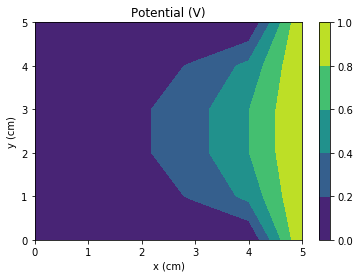

In [5]:
import numpy as np #includes the zeros function
import matplotlib.pyplot as plt

NX = 6
NY = 6
rou = 1-3.14**2/(2*NX**2)
w = []
maxdiff = 1e-6
diff = 1.0 # must start bigger than 'maxdiff'
Vold = np.zeros((NY,NX),float) # fill 'V' with zeros
Vnew = np.zeros((NY,NX),float) 

# Enter the boundary conditions for 'V' other than 0
for i in np.arange(0,NY,1): # j from 0 to NY-1
    Vold[i,NX-1] = 1.0
    Vnew[i,NX-1] = 1.0
r = 0    
w +=[1]
w +=[1/(1-rou**2/2)]
while diff > maxdiff: # repeat until 'diff' is small
    diff = 0.0 # reset for each iteration
    # Loop over all of the interior points_ODD
    for i in np.arange(1,NY-1,2): # i from 1 to NY-2
        for j in np.arange(2,NX-1,2): # j from 1 to NX-2
            Vnew[i,j] = w[2*r]*((Vnew[i-1,j]+Vnew[i+1,j]
                      +Vnew[i,j-1]+Vnew[i,j+1])/4.0)+(1-w[2*r])*Vnew[i,j]
            lastdiff = abs(Vnew[i,j]-Vold[i,j])
            if lastdiff > diff:
                diff = lastdiff
    for i in np.arange(2,NY-1,2): # i from 1 to NY-2
        for j in np.arange(1,NX-1,2): # j from 1 to NX-2
            Vnew[i,j] = w[2*r]*((Vnew[i-1,j]+Vnew[i+1,j]
                      +Vnew[i,j-1]+Vnew[i,j+1])/4.0)+(1-w[2*r])*Vnew[i,j]
            lastdiff = abs(Vnew[i,j]-Vold[i,j])
            if lastdiff > diff:
                diff = lastdiff
     # Loop over all of the interior points_Even
    for i in np.arange(1,NY-1,2): # i from 1 to NY-2
        for j in np.arange(1,NX-1,2): # j from 1 to NX-2 
            Vnew[i,j] = w[2*r+1]*((Vnew[i-1,j]+Vnew[i+1,j]
                      +Vnew[i,j-1]+Vnew[i,j+1])/4.0)+(1-w[2*r+1])*Vnew[i,j]
            lastdiff = abs(Vnew[i,j]-Vold[i,j])
            if lastdiff > diff:
                diff = lastdiff
    for i in np.arange(2,NY-1,2): # i from 1 to NY-2
        for j in np.arange(2,NX-1,2): # j from 1 to NX-2 
            Vnew[i,j] = w[2*r+1]*((Vnew[i-1,j]+Vnew[i+1,j]
                      +Vnew[i,j-1]+Vnew[i,j+1])/4.0)+(1-w[2*r+1])*Vnew[i,j]
            lastdiff = abs(Vnew[i,j]-Vold[i,j])
            if lastdiff > diff:
                diff = lastdiff
    w += [1/(1-rou**2*w[2*r+1]/4)]
    w += [1/(1-rou**2*w[2*r+2]/4)]
    np.copyto(Vold,Vnew) # Update: old is now new.
    r +=1



xlist = np.linspace(0.0,5.0,NX)
ylist = np.linspace(0.0,5.0,NY)
X,Y = np.meshgrid(xlist,ylist)
levels = np.linspace(0.0, 1.0, 6)

fig=plt.figure()
ax = fig.add_subplot(1,1,1)
CP = ax.contourf(X,Y,Vnew,levels)
fig.colorbar(CP)
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_title('Potential (V)')
plt.show()

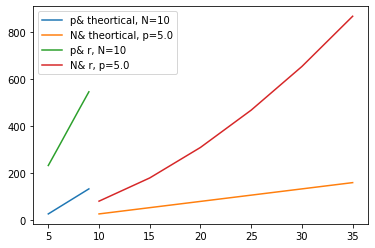

In [17]:
import numpy as np #includes the zeros function

def get_r(p,N):
    N = N+2
    rou = 1-3.14**2/(2*NX**2)
    w = []
    maxdiff = 10**(-p)
    diff = 1.0 # must start bigger than 'maxdiff'
    Vold = np.zeros((N,N),float) # fill 'V' with zeros
    Vnew = np.zeros((N,N),float) 

    # Enter the boundary conditions for 'V' other than 0
    for i in np.arange(0,N,1): # j from 0 to NY-1
        Vold[i,N-1] = 1.0
        Vnew[i,N-1] = 1.0
    r = 0    
    w +=[1]
    w +=[1/(1-rou**2/2)]
    while diff > maxdiff: # repeat until 'diff' is small
        diff = 0.0 # reset for each iteration
        # Loop over all of the interior points_ODD
        for i in np.arange(1,N-1,2): # i from 1 to NY-2
            for j in np.arange(2,N-1,2): # j from 1 to NX-2
                Vnew[i,j] = w[2*r]*((Vnew[i-1,j]+Vnew[i+1,j]
                          +Vnew[i,j-1]+Vnew[i,j+1])/4.0)+(1-w[2*r])*Vnew[i,j]
                lastdiff = abs(Vnew[i,j]-Vold[i,j])
                if lastdiff > diff:
                    diff = lastdiff
        for i in np.arange(2,N-1,2): # i from 1 to NY-2
            for j in np.arange(1,N-1,2): # j from 1 to NX-2
                Vnew[i,j] = w[2*r]*((Vnew[i-1,j]+Vnew[i+1,j]
                          +Vnew[i,j-1]+Vnew[i,j+1])/4.0)+(1-w[2*r])*Vnew[i,j]
                lastdiff = abs(Vnew[i,j]-Vold[i,j])
                if lastdiff > diff:
                    diff = lastdiff
         # Loop over all of the interior points_Even
        for i in np.arange(1,N-1,2): # i from 1 to NY-2
            for j in np.arange(1,N-1,2): # j from 1 to NX-2 
                Vnew[i,j] = w[2*r+1]*((Vnew[i-1,j]+Vnew[i+1,j]
                          +Vnew[i,j-1]+Vnew[i,j+1])/4.0)+(1-w[2*r+1])*Vnew[i,j]
                lastdiff = abs(Vnew[i,j]-Vold[i,j])
                if lastdiff > diff:
                    diff = lastdiff
        for i in np.arange(2,N-1,2): # i from 1 to NY-2
            for j in np.arange(2,N-1,2): # j from 1 to NX-2 
                Vnew[i,j] = w[2*r+1]*((Vnew[i-1,j]+Vnew[i+1,j]
                          +Vnew[i,j-1]+Vnew[i,j+1])/4.0)+(1-w[2*r+1])*Vnew[i,j]
                lastdiff = abs(Vnew[i,j]-Vold[i,j])
                if lastdiff > diff:
                    diff = lastdiff
        w += [1/(1-rou**2*w[2*r+1]/4)]
        w += [1/(1-rou**2*w[2*r+2]/4)]
        np.copyto(Vold,Vnew) # Update: old is now new.
        r +=1
    return r

list_p = np.arange(5,10,1.0)
list_N = np.arange(10,40,5)
r = np.zeros((len(list_p),len(list_N)))
theortical = np.zeros((len(list_p),len(list_N)))
baseline = get_r(4,5)

for i in range(len(list_p)) :
    for j in range(len(list_N)) :
        r[i,j] = get_r(list_p[i],list_N[j])- baseline
        theortical[i,j] = 4/3* (list_p[i]-4) * (list_N[j]-5)

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(list_p, theortical[:,3], label='p& theortical, N='+str(list_N[0]))
ax.plot(list_N, theortical[3,:], label='N& theortical, p='+str(list_p[0]))
ax.plot(list_p, r[:,3], label='p& r, N='+ str(list_N[0]))
ax.plot(list_N, r[3,:], label='N& r, p='+ str(list_p[0]))
ax.legend()
plt.show()


## References

<ol>
<li>J. D. Jackson, <i>Classical Electrodynamics</i>, 2nd ed. (Wiley, 1975), Section 2.10, pp. 71-74.
<li>W. H. Press, S. A. Teukolsky, W. T. Vetterling and B. P. Flannery, <i>Numerical Recipes: The Art of Scientific Computing</i>, 3rd ed. (Cambridge University Press, 2007), Chapter 20: Partial Differential Equations.
</ol>